In [1]:
library(httr)
library(jsonlite) 
library(dplyr)  
library(purrr)  
library(lubridate)
library(testthat)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'purrr'


The following object is masked from 'package:jsonlite':

    flatten



Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union



Attaching package: 'testthat'


The following object is masked from 'package:purrr':

    is_null


The following object is masked from 'package:dplyr':

    matches




$image_path
[1] "C:\\Users\\zheng\\AppData\\Local\\Temp\\RtmpGyjZzy\\file464c146b5f09.png"

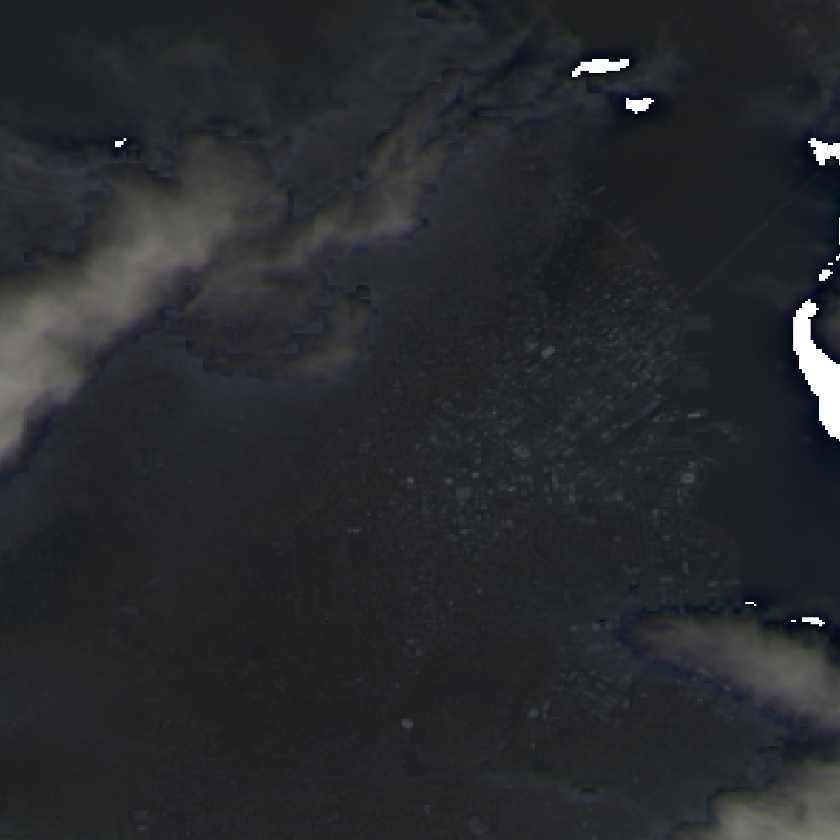

In [2]:
get_earth_image <- function(api_key, lat, lon, date = Sys.Date(), dim = 0.1) {
  url <- "https://api.nasa.gov/planetary/earth/imagery"
  
  response <- httr::GET(url, query = list(
    lat = lat,
    lon = lon,
    date = as.character(date),
    dim = dim,
    api_key = api_key
  ))
  
  httr::stop_for_status(response)
  
  # Save the image to a temp file
  temp_file <- tempfile(fileext = ".png")
  writeBin(httr::content(response, as = "raw"), temp_file)
  
  # Display the image
  img <- png::readPNG(temp_file, native = TRUE)
  grid::grid.raster(img)
  
  # Return the file path in a list
  return(list(image_path = temp_file))
}


get_earth_image('XFsDPHBjdABhXfquwqnJSfhwEY4rCZI2ev2NDU0K', lat = 37.7749, lon = -122.4194)